In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
# create a dataframe for the randomly generated cities
cities_df = pd.DataFrame(cities)
cities_df.columns = ["City"]
cities_df.head()

,City
0,carroll
1,sentyabrskiy
2,mar del plata
3,yamada
4,tsihombe


In [4]:
# create new columns in the dataframe to extract from the API
cities_df['Cloudiness'] = np.nan
cities_df['Country'] = np.nan
cities_df['Date'] = np.nan
cities_df['Humidity'] = np.nan
cities_df['Lat'] = np.nan
cities_df['Lng'] = np.nan
cities_df['Max Temp'] = np.nan
cities_df['Wind Speed'] = np.nan

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,carroll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sentyabrskiy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mar del plata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,yamada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tsihombe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Perform API Calls

In [5]:
# create a params dict that will be updated with new city each iteration
params = {"units": "imperial","appid": api_key}

# Loop through the cities_df and run a lat search for each city
for index, row in cities_df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    
    city = row['City']
    
    #update address key value
    params['q'] = city
    
    # make request
    cities_lat = requests.get(base_url, params=params).json()

    #extract results
    results = cities_lat
    
    try:
        print("Extracting Data for " + city + "city #" +str(index))
        cities_df.loc[index, 'Cloudiness'] = results["clouds"]["all"]
        cities_df.loc[index, 'Country'] = results["sys"]["country"]
        cities_df.loc[index, 'Date'] = results["dt"]
        cities_df.loc[index, 'Humidity'] = results["main"]["humidity"]
        cities_df.loc[index, 'Lat'] = results["coord"]["lat"]
        cities_df.loc[index, 'Lng'] = results["coord"]["lon"]
        cities_df.loc[index, 'Max Temp'] = results["main"]["temp_max"]
        cities_df.loc[index, 'Wind Speed'] = results["wind"]["speed"]
    
    except (KeyError):
        print("Missing field/result..skipping.")


Extracting Data for carrollcity #0
Extracting Data for sentyabrskiycity #1
Missing field/result..skipping.
Extracting Data for mar del platacity #2
Extracting Data for yamadacity #3
Extracting Data for tsihombecity #4
Missing field/result..skipping.
Extracting Data for east londoncity #5
Extracting Data for yellowknifecity #6
Extracting Data for karpathoscity #7
Extracting Data for kalmunaicity #8
Extracting Data for bredasdorpcity #9
Extracting Data for caieirascity #10
Extracting Data for jamestowncity #11
Extracting Data for muisnecity #12
Extracting Data for tazovskiycity #13
Extracting Data for altarcity #14
Extracting Data for ahiparacity #15
Extracting Data for atuonacity #16
Extracting Data for necocheacity #17
Extracting Data for bambous virieuxcity #18
Extracting Data for svetlogradcity #19
Extracting Data for hermanuscity #20
Extracting Data for muroscity #21
Extracting Data for lagoacity #22
Extracting Data for bereznehuvatecity #23
Extracting Data for dunedincity #24
Extra

Extracting Data for latacity #203
Extracting Data for ponta delgadacity #204
Extracting Data for faanuicity #205
Extracting Data for hambantotacity #206
Extracting Data for prachuap khiri khancity #207
Extracting Data for chiriguanacity #208
Extracting Data for kavaratticity #209
Extracting Data for ribeira grandecity #210
Extracting Data for chiredzicity #211
Extracting Data for constitucioncity #212
Extracting Data for tautiracity #213
Extracting Data for massakorycity #214
Extracting Data for chuycity #215
Extracting Data for ourossoguicity #216
Extracting Data for fort nelsoncity #217
Extracting Data for alekseyevkacity #218
Extracting Data for portlandcity #219
Extracting Data for ponta do solcity #220
Extracting Data for yularacity #221
Extracting Data for yagodnoyecity #222
Extracting Data for katsuuracity #223
Extracting Data for krasnoselkupcity #224
Missing field/result..skipping.
Extracting Data for nishiharacity #225
Extracting Data for honiaracity #226
Extracting Data for 

Extracting Data for vaninocity #394
Extracting Data for buceriascity #395
Extracting Data for biucity #396
Extracting Data for mauncity #397
Extracting Data for guerrero negrocity #398
Extracting Data for ambodifototracity #399
Missing field/result..skipping.
Extracting Data for possecity #400
Extracting Data for margatecity #401
Extracting Data for conceicao da barracity #402
Extracting Data for nchelengecity #403
Extracting Data for bascocity #404
Extracting Data for ragacity #405
Missing field/result..skipping.
Extracting Data for hofncity #406
Extracting Data for westportcity #407
Extracting Data for jalucity #408
Extracting Data for ayagozcity #409
Extracting Data for florianopoliscity #410
Extracting Data for luandacity #411
Extracting Data for zyryankacity #412
Extracting Data for bereznikicity #413
Extracting Data for marsh harbourcity #414
Extracting Data for umm jarrcity #415
Missing field/result..skipping.
Extracting Data for nyzycity #416
Extracting Data for ushtobecity #41

Extracting Data for farafanganacity #587
Extracting Data for iroquois fallscity #588
Extracting Data for thayetmyocity #589
Extracting Data for bengkulucity #590
Missing field/result..skipping.
Extracting Data for atarcity #591
Extracting Data for saint maryscity #592
Extracting Data for aquincity #593
Extracting Data for del riocity #594
Extracting Data for hohhotcity #595
Extracting Data for charters towerscity #596
Extracting Data for groacity #597
Extracting Data for atagaycity #598
Extracting Data for tutoiacity #599
Extracting Data for marzuqcity #600
Extracting Data for margaritascity #601
Extracting Data for grand islandcity #602
Extracting Data for hendersonvillecity #603
Extracting Data for cabedelocity #604
Extracting Data for taga dzongcity #605
Missing field/result..skipping.
Extracting Data for sennocity #606
Extracting Data for bahia blancacity #607
Extracting Data for alotaucity #608
Missing field/result..skipping.
Extracting Data for chipionacity #609
Extracting Data f

In [6]:
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,carroll,92.0,AU,1.535659e+09,60.0,-30.99,150.44,42.80,15.21
1,sentyabrskiy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mar del plata,0.0,AR,1.535660e+09,41.0,-46.43,-67.52,50.60,4.14
3,yamada,75.0,JP,1.535656e+09,83.0,36.58,137.08,78.80,10.29
4,tsihombe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,east london,0.0,ZA,1.535660e+09,92.0,-33.02,27.91,71.12,20.69
6,yellowknife,75.0,CA,1.535656e+09,47.0,62.45,-114.38,57.20,2.24
7,karpathos,20.0,GR,1.535657e+09,78.0,35.51,27.21,78.80,16.11
8,kalmunai,36.0,LK,1.535660e+09,100.0,7.42,81.82,73.19,3.58
9,bredasdorp,32.0,ZA,1.535656e+09,87.0,-34.53,20.04,60.80,1.12


In [7]:
# Remove cities that do not have values
cities_df_clean = cities_df.dropna(axis=0, how='any', inplace=False)
cities_df_clean

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,carroll,92.0,AU,1.535659e+09,60.0,-30.99,150.44,42.80,15.21
2,mar del plata,0.0,AR,1.535660e+09,41.0,-46.43,-67.52,50.60,4.14
3,yamada,75.0,JP,1.535656e+09,83.0,36.58,137.08,78.80,10.29
5,east london,0.0,ZA,1.535660e+09,92.0,-33.02,27.91,71.12,20.69
6,yellowknife,75.0,CA,1.535656e+09,47.0,62.45,-114.38,57.20,2.24
7,karpathos,20.0,GR,1.535657e+09,78.0,35.51,27.21,78.80,16.11
8,kalmunai,36.0,LK,1.535660e+09,100.0,7.42,81.82,73.19,3.58
9,bredasdorp,32.0,ZA,1.535656e+09,87.0,-34.53,20.04,60.80,1.12
10,caieiras,0.0,BR,1.535659e+09,37.0,-23.36,-46.75,82.40,8.05
11,jamestown,92.0,AU,1.535660e+09,99.0,-33.21,138.60,47.09,15.66


In [8]:
# save cities_df_clean as a csv
cities_df_clean.to_csv('resources/cities.csv')

# Latitude vs. Temperature Plot

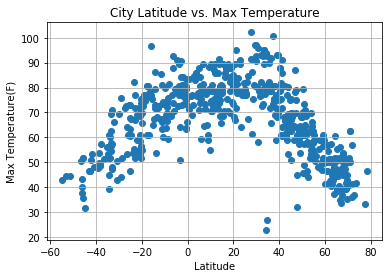

In [9]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.savefig('graphs/Lat_MaxTemp.png')
plt.show()

# Latitude vs. Humidity Plot

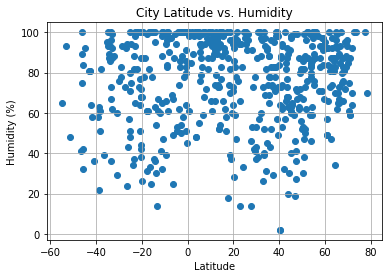

In [10]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.savefig('graphs/Lat_Humidity.png')
plt.show()

# Latitude vs. Cloudiness Plot

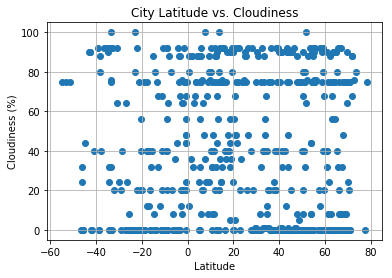

In [11]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.savefig('graphs/Lat_Cloudiness.png')
plt.show()

# Latitude vs. Wind Speed Plot

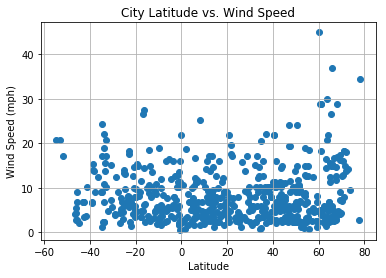

In [12]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.savefig('graphs/Lat_WindSpeed.png')
plt.show()

# Three Observations:

- Cities closer to Lat 0 have higher temperatures
- The rate of temperature decrease is higher for cities above the equator.
- Cities above the equator have a closer temperature range along with higher temperatures. 
- Humiditiy, Cloudiness, and Wind Speed do not seem to have a connection to Latitude